In [1]:
%matplotlib widget

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
import scipy.stats as st
from pathlib import Path


In [30]:
#pull in CSV df - 2019 through 2021 - vehicle csv

csv_path2019 = Path("Resources/vehicle_2019.csv")
csv_path2020 = Path("Resources/vehicle_2020.csv")
csv_path2021 = Path("Resources/vehicle_2021.csv")

vehicle2019_df = pd.read_csv(csv_path2019, encoding='cp1252', low_memory=False)
vehicle2020_df = pd.read_csv(csv_path2020, encoding='cp1252', low_memory=False)
vehicle2021_df = pd.read_csv(csv_path2021, encoding='cp1252', low_memory=False)


In [4]:
#clean data for CA (Legal) -  years 2019 through 2021 - MONTHNAME - ACC_TYPE - OWNER - MAK_MODNAME- BODY_TYPNAME - HARM_EVNAME - MAN_COLLNAME - VNUM_LAN(exculed 1 lane)

#legal_2019_df = cleaned2019.loc[(cleaned_2019['STATE']== "6")]


In [5]:
#clean data for (Somewhat Legal) - years 2019 through 2021 - MONTHNAME - ACC_TYPE - OWNER - MAK_MODNAME- BODY_TYPNAME - HARM_EVNAME - MAN_COLLNAME - VNUM_LAN(exculed 1 lane)

#somewhat_legal_2019_df = cleaned_2019.loc[cleaned_2019['STATE'].isin([15,49])]

In [6]:
#clean data for (Illegal) - years 2019 through 2021 - MONTHNAME - ACC_TYPE - OWNER - MAK_MODNAME- BODY_TYPNAME - HARM_EVNAME - MAN_COLLNAME - VNUM_LAN(exculed 1 lane)

#illegal_2019_df = cleaned_2019.loc[~cleaned_2019['STATE'].isin([6,15,49,30,35,48,40,29,5,28,20,39,54,37,34,43,52])] 

In [7]:
#clean data for (Not Mentioned) - years 2019 through 2021 - MONTHNAME - ACC_TYPE - OWNER - MAK_MODNAME- BODY_TYPNAME - HARM_EVNAME - MAN_COLLNAME - VNUM_LAN(exculed 1 lane)

#not_mentioned__2019df = cleaned_2019.loc[cleaned_2019['STATE'].isin([30,35,48,40,29,5,28,20,39,54,37,34])] 

In [27]:
# Data of motorcycle registration numbers cleaned and displayed

motorcycle_df = pd.read_csv("Resources/motorcycles.csv")

motorcycle_clean= motorcycle_df.drop(0)
column_names = motorcycle_clean.iloc[0].fillna("State")
motorcycle_clean.columns = column_names
motorcycle_clean = motorcycle_clean.drop([1,54,55])
motorcycles_df = motorcycle_clean[["State", "2019","2020","2021"]]
motor_reg= motorcycles_df.copy()

motor_reg[["2019", "2020","2021"]] = motor_reg[["2019", "2020","2021"]].astype(str).apply(lambda x: x.str.replace(',', ''))
motor_reg[["2019", "2020","2021"]] = motor_reg[["2019", "2020","2021"]].astype(float)


motor_reg.head()



1,State,2019,2020,2021
2,Alabama,173652.0,171077.0,167021.0
3,Alaska,24340.0,23918.0,23068.0
4,Arizona,212951.0,216705.0,222484.0
5,Arkansas,71764.0,70586.0,72474.0
6,California,957620.0,957873.0,952977.0


In [9]:
# Motorcycles that are registered split up by laws

legal_reg = motor_reg.loc[motor_reg["State"] =="California"]

somewhat_legal_reg = motor_reg.loc[motor_reg["State"].isin(["Utah","Hawaii"])]

not_mentioned_reg= motor_reg.loc[motor_reg["State"].isin(["Montana", "New Mexico", "Texas", "Oklahoma",
                                                                  "Missouri", "Arkansas", "Ohio", "Kentucky",
                                                                  "North Carolina", "West Virginia", "Delaware","Mississippi"])]

illegal_reg = motor_reg.loc[~motor_reg["State"].isin(["Montana", "New Mexico", "Texas", "Oklahoma",
                                                                  "Missouri", "Arkansas", "Ohio", "Kentucky",
                                                                  "North Carolina", "West Virginia", "Delaware","Mississippi",
                                                                  "California","Utah","Hawaii", "Total"])]

# Count of Registered Motorcycles calculated for all law groups:

legal_reg_2019 = legal_reg.iloc[0, 1]
legal_reg_2020 = legal_reg.iloc[0,2]
legal_reg_2021 = legal_reg.iloc[0,3]
legal_reg_total = legal_reg_2019 + legal_reg_2020 + legal_reg_2021

somewhat_legal_reg_2019 = somewhat_legal_reg.iloc[:, 1].sum()
somewhat_legal_reg_2020 = somewhat_legal_reg.iloc[:,2].sum()
somewhat_legal_reg_2021 = somewhat_legal_reg.iloc[:,3].sum()
somewhat_legal_reg_total = somewhat_legal_reg_2019 + somewhat_legal_reg_2020 + somewhat_legal_reg_2021

not_mentioned_reg_2019 = legal_reg.iloc[:, 1].sum()
not_mentioned_reg_2020 = legal_reg.iloc[:,2].sum()
not_mentioned_reg_2021 = legal_reg.iloc[:,3].sum()
not_mentioned_reg_total = not_mentioned_reg_2019 + not_mentioned_reg_2020 + not_mentioned_reg_2021

illegal_reg_2019 = illegal_reg.iloc[:, 1].sum()
illegal_reg_2020 = illegal_reg.iloc[:,2].sum()
illegal_reg_2021 = illegal_reg.iloc[:,3].sum()
illegal_reg_total = illegal_reg_2019 + illegal_reg_2020 + illegal_reg_2021



In [10]:
# Motorcycle type affects safety of lane splitting (Calvin)

In [11]:
# Motorcycle laws affects fewer crashes (Rail)

In [12]:
# Motorcycle laws affects deadly crashes (Jack)

# Filter the dataframes for each year for appropriate columns

df_list = [vehicle2019_df, vehicle2020_df, vehicle2021_df]

filtered_df_list=[]

for df in df_list:

    cleaned_df = df[['STATE','BODY_TYP','MONTH','DEATHS','OWNER']]
    motorcycle_df = cleaned_df.loc[cleaned_df['BODY_TYP']== 80]
    summer_df = motorcycle_df.loc[(motorcycle_df['MONTH'] >= 4) & (motorcycle_df['MONTH'] <= 8)]
    final_filter_df = summer_df.loc[(summer_df['OWNER'] != 0) & (summer_df['DEATHS'] > 0)]

    filtered_df_list.append(final_filter_df)



In [13]:
# Motorcycle laws affects deadly crashes (Jack) 

# add filtered data frames to law groups for all years:

legal_group = []
somewhat_legal_group = []
not_mentioned_group = []
illegal_group = []


for df in filtered_df_list:
    legal_df = df.loc[(df['STATE']== 6)]
 
    somewhat_legal_df = df.loc[df['STATE'].isin([15,49])]
                                  
    not_mentioned_df = df.loc[df['STATE'].isin([30,35,48,40,29,5,28,20,39,54,37,34])]                      

    illegal_df = df.loc[~df['STATE'].isin([6,15,49,30,35,48,40,29,5,28,20,39,54,37,34,43,52])]  

    legal_group.append(legal_df)
    somewhat_legal_group.append(somewhat_legal_df)
    not_mentioned_group.append(not_mentioned_df)
    illegal_group.append(illegal_df)

    


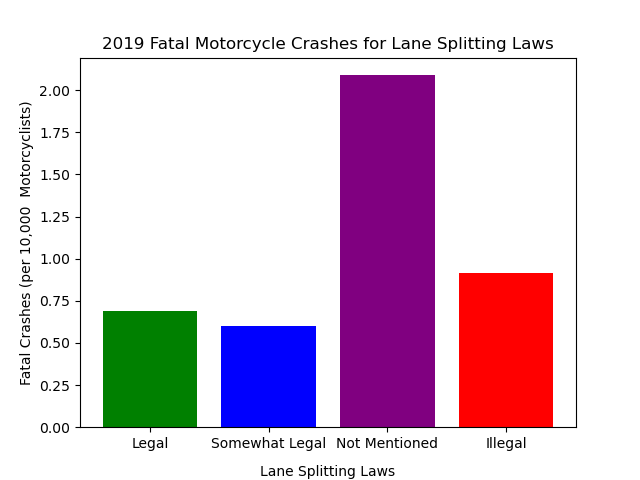

200


In [40]:
# Motorcycle laws affects deadly crashes 2019 (Jack) 

legal_deaths = legal_group[0]["DEATHS"].count()
somewhat_legal_deaths = somewhat_legal_group[0]["DEATHS"].count()
not_mentioned_deaths = not_mentioned_group[0]["DEATHS"].count()
illegal_deaths = illegal_group[0]["DEATHS"].count()

legal_per_reg = (legal_deaths / legal_reg_2019) * 10000
somewhat_legal_per_reg = (somewhat_legal_deaths / somewhat_legal_reg_2019) * 10000
not_mentioned_per_reg = (not_mentioned_deaths / not_mentioned_reg_2019) * 10000
illegal_per_reg  = (illegal_deaths/ illegal_reg_2019) * 10000

laws = ["Legal", "Somewhat Legal", "Not Mentioned", "Illegal"]
counts = [legal_per_reg,somewhat_legal_per_reg, not_mentioned_per_reg, illegal_per_reg]
x_ticks = [value for value in laws]

fig, ax = plt.subplots()
ax.bar(laws, counts, color = ["green", "blue","purple","red"])
ax.set_xticks(x_ticks)
ax.set_title("2019 Fatal Motorcycle Crashes for Lane Splitting Laws")
ax.set_xlabel("Lane Splitting Laws", labelpad= 10)
ax.set_ylabel("Fatal Crashes (per 10,000  Motorcyclists)")
plt.show()

print(not_mentioned_deaths)

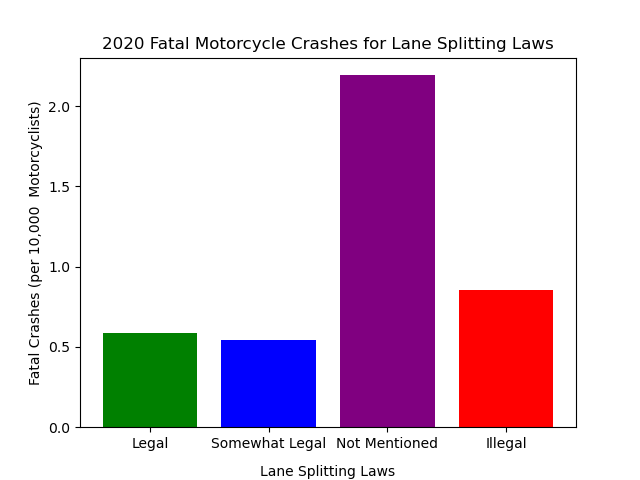

In [38]:
# Motorcycle laws affects deadly crashes 2020 (Jack) 

legal_deaths = legal_group[1]["DEATHS"].count()
somewhat_legal_deaths = somewhat_legal_group[1]["DEATHS"].count()
not_mentioned_deaths = not_mentioned_group[1]["DEATHS"].count()
illegal_deaths = illegal_group[1]["DEATHS"].count()

legal_per_reg = (legal_deaths / legal_reg_2020) * 10000
somewhat_legal_per_reg = (somewhat_legal_deaths / somewhat_legal_reg_2020) * 10000
not_mentioned_per_reg = (not_mentioned_deaths / not_mentioned_reg_2020) * 10000
illegal_per_reg  = (illegal_deaths/ illegal_reg_2020) * 10000

laws = ["Legal", "Somewhat Legal", "Not Mentioned", "Illegal"]
counts = [legal_per_reg,somewhat_legal_per_reg, not_mentioned_per_reg, illegal_per_reg]
x_ticks = [value for value in laws]

fig, ax = plt.subplots()
ax.bar(laws, counts, color = ["green", "blue","purple","red"])
ax.set_xticks(x_ticks)
ax.set_title("2020 Fatal Motorcycle Crashes for Lane Splitting Laws")
ax.set_xlabel("Lane Splitting Laws", labelpad= 10)
ax.set_ylabel("Fatal Crashes (per 10,000  Motorcyclists)")
plt.show()


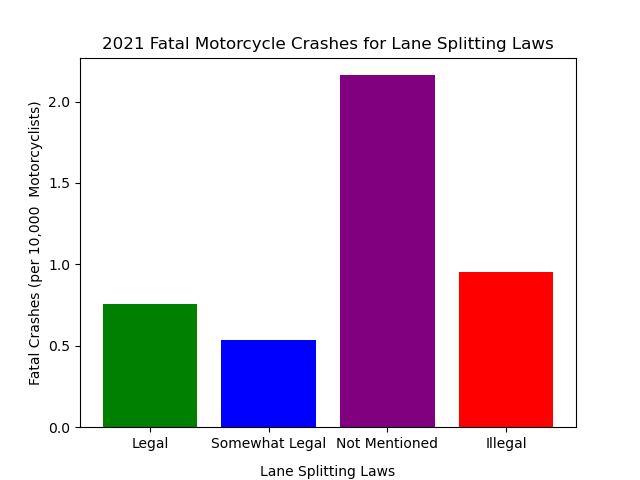

In [39]:
# Motorcycle laws affects deadly crashes 2021 (Jack) 

legal_deaths = legal_group[2]["DEATHS"].count()
somewhat_legal_deaths = somewhat_legal_group[2]["DEATHS"].count()
not_mentioned_deaths = not_mentioned_group[2]["DEATHS"].count()
illegal_deaths = illegal_group[2]["DEATHS"].count()

legal_per_reg = (legal_deaths / legal_reg_2021) * 10000
somewhat_legal_per_reg = (somewhat_legal_deaths / somewhat_legal_reg_2021) * 10000
not_mentioned_per_reg = (not_mentioned_deaths / not_mentioned_reg_2021) * 10000
illegal_per_reg  = (illegal_deaths/ illegal_reg_2021) * 10000

laws = ["Legal", "Somewhat Legal", "Not Mentioned", "Illegal"]
counts = [legal_per_reg,somewhat_legal_per_reg, not_mentioned_per_reg, illegal_per_reg]
x_ticks = [value for value in laws]

fig, ax = plt.subplots()
ax.bar(laws, counts, color = ["green", "blue","purple","red"])
ax.set_xticks(x_ticks)
ax.set_title("2021 Fatal Motorcycle Crashes for Lane Splitting Laws")
ax.set_xlabel("Lane Splitting Laws", labelpad= 10)
ax.set_ylabel("Fatal Crashes (per 10,000  Motorcyclists)")
plt.show()



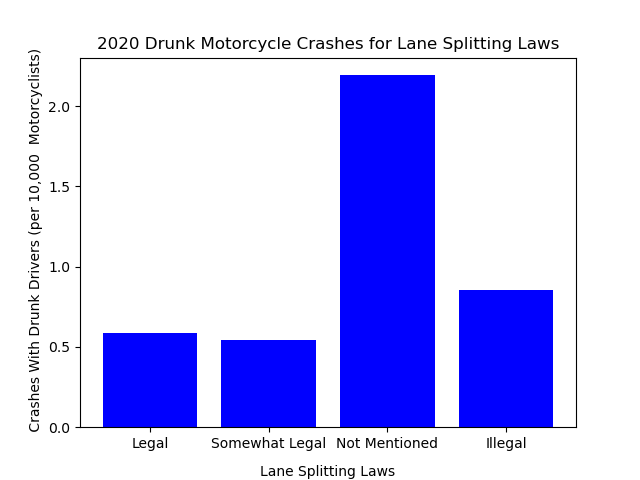

In [37]:
df_list = [vehicle2019_df, vehicle2020_df, vehicle2021_df]

filtered_df_list=[]

for df in df_list:

    cleaned_df = df[['STATE','BODY_TYP','MONTH','DEATHS','OWNER','DR_DRINK']]
    motorcycle_df = cleaned_df.loc[cleaned_df['BODY_TYP']== 80]
    summer_df = motorcycle_df.loc[(motorcycle_df['MONTH'] >= 4) & (motorcycle_df['MONTH'] <= 8)]
    final_filter_df = summer_df.loc[(summer_df['OWNER'] != 0) & (summer_df['DR_DRINK'] > 0)]


    filtered_df_list.append(final_filter_df)


legal_group = []
somewhat_legal_group = []
not_mentioned_group = []
illegal_group = []


for df in filtered_df_list:
    legal_df = df.loc[(df['STATE']== 6)]
 
    somewhat_legal_df = df.loc[df['STATE'].isin([15,49])]
                                  
    not_mentioned_df = df.loc[df['STATE'].isin([30,35,48,40,29,5,28,20,39,54,37,34])]                      

    illegal_df = df.loc[~df['STATE'].isin([6,15,49,30,35,48,40,29,5,28,20,39,54,37,34,43,52])]  

    legal_group.append(legal_df)
    somewhat_legal_group.append(somewhat_legal_df)
    not_mentioned_group.append(not_mentioned_df)
    illegal_group.append(illegal_df)


legal_drunk = legal_group[1]["DEATHS"].count()
somewhat_legal_drunk = somewhat_legal_group[1]["DEATHS"].count()
not_mentioned_drunk = not_mentioned_group[1]["DEATHS"].count()
illegal_drunk = illegal_group[1]["DEATHS"].count()

legal_per_reg = (legal_drunk / legal_reg_2020) * 10000
somewhat_legal_per_reg = (somewhat_legal_drunk / somewhat_legal_reg_2020) * 10000
not_mentioned_per_reg = (not_mentioned_drunk / not_mentioned_reg_2020) * 10000
illegal_per_reg  = (illegal_drunk/ illegal_reg_2020) * 10000

laws = ["Legal", "Somewhat Legal", "Not Mentioned", "Illegal"]
counts = [legal_per_reg,somewhat_legal_per_reg, not_mentioned_per_reg, illegal_per_reg]
x_ticks = [value for value in laws]

fig, ax = plt.subplots()
ax.bar(laws, counts, color = "blue")
ax.set_xticks(x_ticks)
ax.set_title("2020 Drunk Motorcycle Crashes for Lane Splitting Laws")
ax.set_xlabel("Lane Splitting Laws", labelpad= 10)
ax.set_ylabel(" Crashes With Drunk Drivers (per 10,000  Motorcyclists)")
plt.show()
    

    

In [17]:
# Motorcycle  laws affects injuries (Rachael)

In [18]:
#compare UT years accidents with chart 

In [19]:
#compare ID years accidents with chart 

In [20]:
#compare UT & ID to CA with chart

In [21]:
#compare COLL types 